# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [172]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [24]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
studyMeta = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
studyMeta.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice.
len(studyMeta["Mouse ID"].unique())

249

In [26]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
doubleDetector = studyMeta[["Mouse ID", "Timepoint"]].value_counts()
MickeyDup = doubleDetector.loc[doubleDetector >= 2, :]
MickeyDup

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
Name: count, dtype: int64

In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
studyMeta.loc[studyMeta["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
studyMeta = studyMeta.loc[studyMeta["Mouse ID"] != "g989", :]

studyMeta.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [29]:
# Checking the number of mice in the clean DataFrame.
len(studyMeta["Mouse ID"].unique())

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drugTypes = studyMeta["Drug Regimen"].unique()

drugRegimen = []
for val in range(0, len(drugTypes)):
    drugRegimen.append(drugTypes[val])

drugMean = []
drugMedian = []
drugVariance = []
drugSTDEV = []
drugSEM = []

i = 0
for i in range(0, len(drugTypes)):

    drugMean.append(studyMeta.loc[studyMeta["Drug Regimen"] == drugTypes[i], :]["Tumor Volume (mm3)"].mean())
    drugMedian.append(studyMeta.loc[studyMeta["Drug Regimen"] == drugTypes[i], :]["Tumor Volume (mm3)"].median())
    drugVariance.append(studyMeta.loc[studyMeta["Drug Regimen"] == drugTypes[i], :]["Tumor Volume (mm3)"].var())
    drugSTDEV.append(studyMeta.loc[studyMeta["Drug Regimen"] == drugTypes[i], :]["Tumor Volume (mm3)"].std())
    drugSEM.append(studyMeta.loc[studyMeta["Drug Regimen"] == drugTypes[i], :]["Tumor Volume (mm3)"].sem())


# Assemble the resulting series into a single summary DataFrame.
drugSummary_df = pd.DataFrame({
    "Drug Regimen": drugRegimen,
    "Mean Tumor Volume": drugMean,
    "Median Tumor Volume": drugMedian,
    "Variance of Tumor Volume": drugVariance,
    "St. Dev. of Tumor Volume": drugSTDEV,
    "St. Err. of Tumor Volume": drugSEM,
})


drugSummary_df = drugSummary_df.set_index("Drug Regimen")
drugSummary_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,St. Dev. of Tumor Volume,St. Err. of Tumor Volume
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332


In [31]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

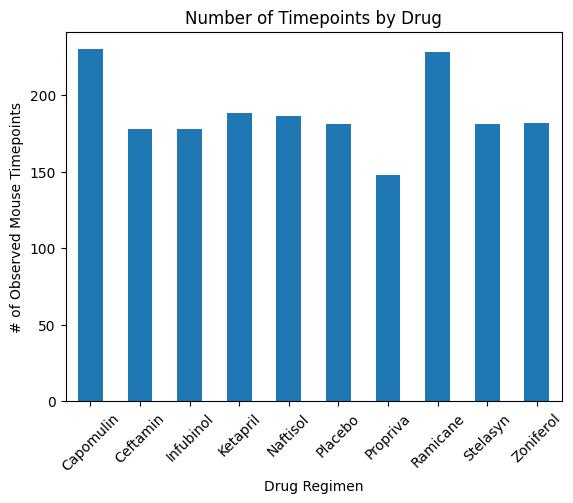

<Figure size 640x480 with 0 Axes>

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_groups = studyMeta.groupby('Drug Regimen')

drug_timepoints = drug_groups['Timepoint'].count()


studyMeta_chart = drug_timepoints.plot(kind = "bar", title = "Number of Timepoints by Drug", rot = 45)
studyMeta_chart.set_xlabel("Drug Regimen")
studyMeta_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()



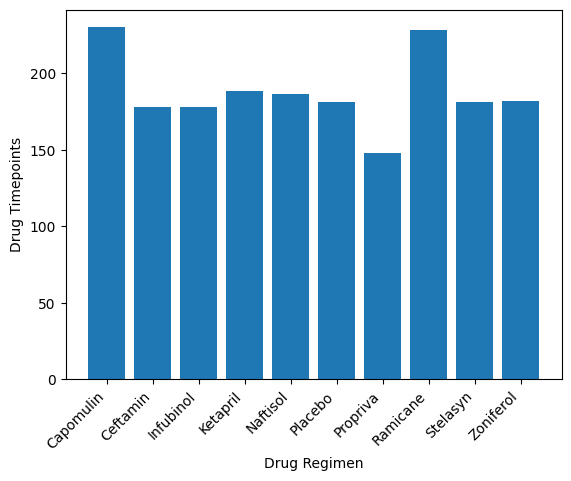

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugGrouping = studyMeta.groupby('Drug Regimen')


drug_timepointsCount = drugGrouping['Timepoint'].count()


drugNames = []
timepointCount = []
i = 0
for i in range(0, len(drug_timepointsCount)):
    drugNames.append(drugGrouping["Drug Regimen"].describe()["top"][i])
    timepointCount.append(drug_timepointsCount[i])
    
    
#drugNames
   
plt.bar(drugNames, drug_timepoints)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Drug Regimen')
plt.ylabel('Drug Timepoints')
plt.show()
#plt.tight_layout()


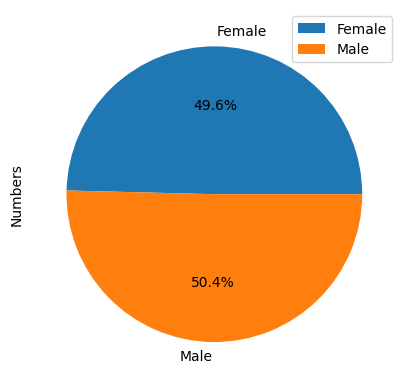

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
studyMale = len(studyMeta.loc[ studyMeta["Sex"] == "Male", :]["Mouse ID"].unique())
studyFemale = len(studyMeta.loc[ studyMeta["Sex"] == "Female", :]["Mouse ID"].unique())

SexMeta = pd.DataFrame({
    "Sex": ["Female", "Male"],
    "Numbers": [studyFemale, studyMale]
})
SexMeta = SexMeta.set_index("Sex")


study_pie = SexMeta.plot.pie(y = "Numbers", autopct='%0.1f%%')


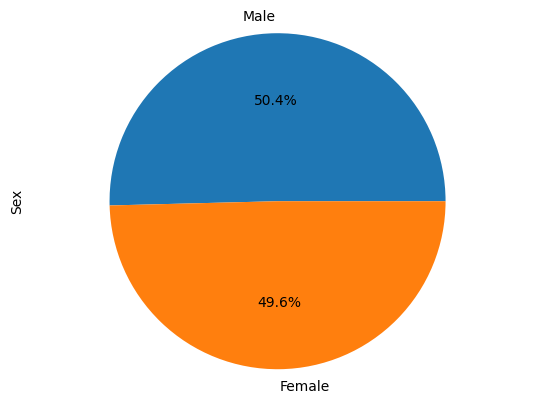

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
studyMale = len(studyMeta.loc[ studyMeta["Sex"] == "Male", :]["Mouse ID"].unique())
studyFemale = len(studyMeta.loc[ studyMeta["Sex"] == "Female", :]["Mouse ID"].unique())

sexTypes = ["Male", "Female"]
sexList = [studyMale, studyFemale]



plt.pie(sexList, labels = sexTypes, autopct="%.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

### Shorthand:
### CP (Capomulin)
### RM (Ramicane)
### IF (Infubinol)
### CF (Ceftamin)

wantedDrugs = studyMeta.loc[ (studyMeta["Drug Regimen"] != "Stelasyn") & (studyMeta["Drug Regimen"] != "Zoniferol"), :]
wantedDrugs = wantedDrugs.loc[ (wantedDrugs["Drug Regimen"] != "Ketapril") & (wantedDrugs["Drug Regimen"] != "Naftisol") & (studyMeta["Drug Regimen"] != "Propriva"), :]




mouseNames = wantedDrugs["Mouse ID"].unique()

# Start by getting the last (greatest) timepoint for each mouse
finalTumorSize = []
drugNameList = []
i = 0

for i in range(0, len(mouseNames)):

    mouseIndie = wantedDrugs.loc[ wantedDrugs["Mouse ID"] == mouseNames[i], : ]
    lastTime = mouseIndie["Timepoint"].max()
    
    drugName = mouseIndie.loc[ mouseIndie["Timepoint"] == lastTime, : ]["Drug Regimen"].unique()
    drugName = drugName[0]
    drugNameList.append(drugName)
    
    tumorSize = mouseIndie.loc[ mouseIndie["Timepoint"] == lastTime, : ]["Tumor Volume (mm3)"].unique()
    tumorSize = tumorSize[0]
    finalTumorSize.append(tumorSize)

    
##"Mouse Name": mouseNames,##

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
wantedDrug_df = pd.DataFrame({
    "Drug": drugNameList,
    "Final Tumor Volume (mm3)": finalTumorSize   
})



wantedDrug_df.head(10)




,Drug,Final Tumor Volume (mm3)
0,Ramicane,22.050126
1,Capomulin,23.343598
2,Capomulin,28.484033
3,Capomulin,28.430964
4,Ramicane,29.128472
5,Ramicane,30.276232
6,Capomulin,30.485985
7,Ramicane,30.564625
8,Ramicane,30.638696
9,Ramicane,31.560470


In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
wantedDrugs = studyMeta.loc[ (studyMeta["Drug Regimen"] != "Stelasyn") & (studyMeta["Drug Regimen"] != "Zoniferol"), :]
wantedDrugs = wantedDrugs.loc[ (wantedDrugs["Drug Regimen"] != "Ketapril") & (wantedDrugs["Drug Regimen"] != "Naftisol") & (studyMeta["Drug Regimen"] != "Propriva"), :]


# Start by getting the last (greatest) timepoint for each mouse
mouseNames = wantedDrugs["Mouse ID"].unique()

finalTimepoint = []
i = 0

for i in range(0, len(mouseNames)):

    mouseIndie = wantedDrugs.loc[ wantedDrugs["Mouse ID"] == mouseNames[i], : ]
    lastTime = mouseIndie["Timepoint"].max()
    finalTimepoint.append(lastTime)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint    
    

In [64]:
### CP (Capomulin)
### RM (Ramicane)
### IF (Infubinol)
### CF (Ceftamin)

# Put treatments into a list for for loop (and later for plot labels)
drugNameList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

i = 0





DrugPlotData = pd.DataFrame({})


for i in range(0, len(drugNameList)):

    # Create empty list to fill with tumor vol data (for plotting)
    #blankDataFrame = wantedDrug_df.loc[wantedDrug_df["Drug"] == drugNameList[i], :]
    
    emptySet = [drugNameList[i]]
    
    
    
    
    for j in range(0, len(wantedDrug_df["Drug"])):
        
        if wantedDrug_df["Drug"][j] == drugNameList[i]:
            
            emptySet.append(wantedDrug_df["Final Tumor Volume (mm3)"][j])
        
        
    #print(emptySet)
    
    DrugPlotData[drugNameList[i]] = emptySet
    
    emptySet = []

    

In [41]:


CP_nums = DrugPlotData["Capomulin"][1:len(DrugPlotData["Capomulin"])]
RM_nums = DrugPlotData["Ramicane"][1:len(DrugPlotData["Ramicane"])]
IF_nums = DrugPlotData["Infubinol"][1:len(DrugPlotData["Infubinol"])]
CF_nums = DrugPlotData["Ceftamin"][1:len(DrugPlotData["Ceftamin"])]


#print(f"Capomulin: \n{boxesCP}")

DrugBoxData = pd.DataFrame({
    "Capomulin": CP_nums,
    "Ramicane": RM_nums,
    "Infubinol": IF_nums,
    "Ceftamin": CF_nums,
})


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

boxesCP = CP_nums.quantile([0.25,0.5,0.75])
boxesRM = RM_nums.quantile([0.25,0.5,0.75])
boxesIF = IF_nums.quantile([0.25,0.5,0.75])
boxesCF = CF_nums.quantile([0.25,0.5,0.75])

CP_IQR = (CP_nums.quantile([0.75]).unique()[0] - CP_nums.quantile([0.25]).unique()[0]) * 1.5
RM_IQR = (RM_nums.quantile([0.75]).unique()[0] - RM_nums.quantile([0.25]).unique()[0]) * 1.5
IF_IQR = (IF_nums.quantile([0.75]).unique()[0] - IF_nums.quantile([0.25]).unique()[0]) * 1.5
CF_IQR = (CF_nums.quantile([0.75]).unique()[0] - CF_nums.quantile([0.25]).unique()[0]) * 1.5

    
    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset 

    
    # Determine outliers using upper and lower bounds
    
CP_Outliers = DrugBoxData.loc[ (DrugBoxData["Capomulin"] >= CP_nums.quantile([0.75]).unique()[0] + CP_IQR) | (DrugBoxData["Capomulin"] <= CP_nums.quantile([0.25]).unique()[0] - CP_IQR)  , :]        
RM_Outliers = DrugBoxData.loc[ (DrugBoxData["Ramicane"] >= RM_nums.quantile([0.75]).unique()[0] + RM_IQR) | (DrugBoxData["Ramicane"] <= RM_nums.quantile([0.25]).unique()[0] - RM_IQR)  , :] 
IF_Outliers = DrugBoxData.loc[ (DrugBoxData["Infubinol"] >= IF_nums.quantile([0.75]).unique()[0] + IF_IQR) | (DrugBoxData["Infubinol"] <= IF_nums.quantile([0.25]).unique()[0] - IF_IQR)  , :]        
CF_Outliers = DrugBoxData.loc[ (DrugBoxData["Ceftamin"] >= CF_nums.quantile([0.75]).unique()[0] + CF_IQR) | (DrugBoxData["Ceftamin"] <= CF_nums.quantile([0.25]).unique()[0] - CF_IQR)  , :] 
    
    
    
print(f"Capomulin Outliers:\n{CP_Outliers}")

print(f"Ramicane Outliers:\n{RM_Outliers}")

print(f"Infubinol Outliers:\n{IF_Outliers}") 

print(f"Ceftamin Outliers:\n{CF_Outliers}") 
    
    

Capomulin Outliers:
Empty DataFrame
Columns: [Capomulin, Ramicane, Infubinol, Ceftamin]
Index: []
Ramicane Outliers:
Empty DataFrame
Columns: [Capomulin, Ramicane, Infubinol, Ceftamin]
Index: []
Infubinol Outliers:
   Capomulin  Ramicane  Infubinol   Ceftamin
6  31.896238  31.56047  36.321346  47.784682
Ceftamin Outliers:
Empty DataFrame
Columns: [Capomulin, Ramicane, Infubinol, Ceftamin]
Index: []


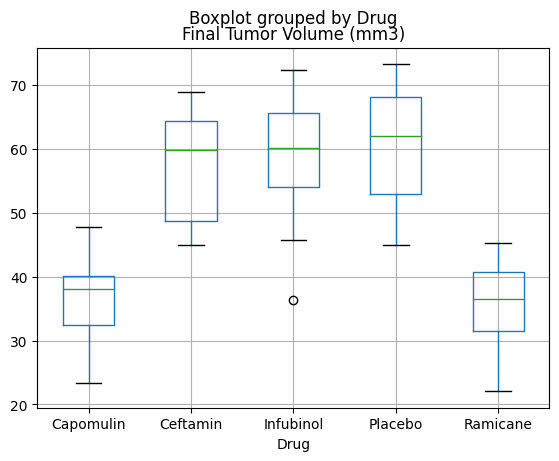

In [89]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

drugGraph = wantedDrug_df.boxplot(column = "Final Tumor Volume (mm3)", by = "Drug")



## Line and Scatter Plots

<Axes: >

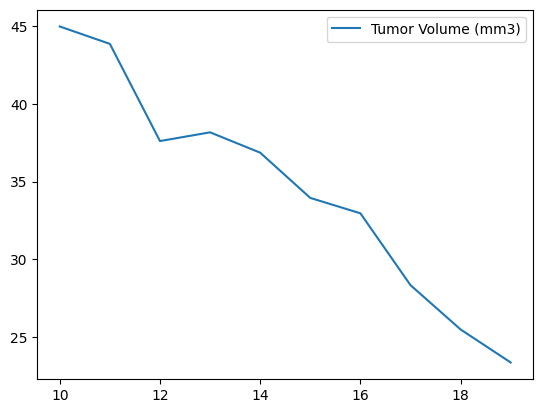

In [110]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

randMouse = studyMeta[["Mouse ID", "Tumor Volume (mm3)"]].loc[studyMeta["Mouse ID"] == "s185", :]
#randMouse["Timepoint"], randMouse["Tumor Volume (mm3)"]

randMouse.plot.line(title = "Tumor Volume for Mouse s185 ")




<Axes: xlabel='Weight (g)', ylabel='Average Tumor Size (mm3)'>

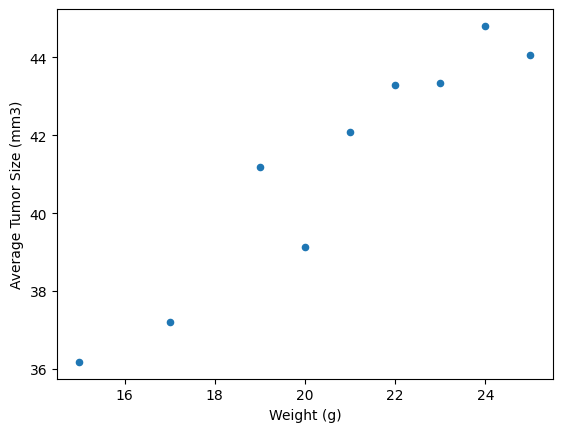

In [191]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capoMeta = studyMeta.loc[studyMeta["Drug Regimen"] == "Capomulin", :]
capoWeights = capoMeta["Weight (g)"].unique()


                

    
avgTumorList = [] 
for i in range(0, len(capoWeights)):
    avgTumors = capoMeta.loc[ capoMeta["Weight (g)"] == capoWeights[i], : ]["Tumor Volume (mm3)"].mean()
    avgTumorList.append(avgTumors)


avgTumorList


capoMeta_df = pd.DataFrame({
    "Weight (g)": capoWeights,
    "Average Tumor Size (mm3)": avgTumorList
})

capoMeta_df.plot.scatter("Weight (g)", "Average Tumor Size (mm3)")


## Correlation and Regression

In [199]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
st.goodness_of_fit(dist = '', capoMeta_df)

capoCORR = np.corrcoef(capoMeta_df["Weight (g)"], capoMeta_df["Average Tumor Size (mm3)"])

print(f"The correlation between mouse weight and the average tumor volume is {round(capoCORR[0, 1], 2)}")


SyntaxError: positional argument follows keyword argument (1031667873.py, line 3)